## Nature's Cost Function: A Path-Based Approach to Quantum Simulation
Tim Strang, Isabella Caruso, and Sam Greydanus | 2023 | MIT License

This tutorial covers the necessary adaptations needed to apply our classical action minimization technique to quantum systems. Feynman's Ph.D. thesis laid out the mathematical backing for this, introducing the world to his _path integral_ formulation of quantum mechanics. Unfortunately, his equations are generally too dense to find solutions with direct analysis. A numerical path integral "calculator" is what we will be building up to here. However, we acknowledge that this is not a branch of physics that our audience is likely to have studied in depth. So, we will start with a brief heuristic explanation of path integrals and the surprisingly basic physical intuitions behind them.

**_This cell is not necessary to run a quantum simulation, only to explain how it works. If you are familiar with path integrals or just want to play with outputs, skip down one cell._**

### The Double Slit Experiment
<p align="middle">
  <img src="static/Double-slit_setup.png" width="500" />
</p>
Anyone who has taken an introductory course in quantum mechanics is likely familiar the double slit experiment. To summarize, we find that while quantum particles like photons and electrons are only ever detected in discrete units, they travel through space in the form of probabilistic waves. These waves can interfere with one another just as classical waves do, resulting in detectable interference patterns. The medium a quantum wave travels in is different from that of a classical wave; quantum interference patterns are really just regions of higher or lower particle densities (loosely speaking). Despite this, the math we use to predict these patterns is fundamentally the same. Let's dive one layer deeper and introduce some of that math. Once we have this down, we will only be one or two generalizations away from writing down Feynman's equations.

**Double Slit Math**
![](static/dublslit.png)
If we assume a single homogeneous plane wave hits a barrier containing two point-like slits, Huygen's principle tells us that the slits will act as sources of radially-propagating wavefronts on the other side of the barrier. Thus, if we know the wavelength $\lambda$ that hits the barrier, we can calculate the phase change of the wave as a function of the distance it has propagated since exiting a slit.

$$\begin{equation}
\phi = 2\pi L / \lambda 
\end{equation}$$

where $\phi$ is expressed in radians and L is the distance travelled. Now we can calculate the phase difference between wavefronts coming from either slit as a function of our chosen measurement location. This is algorithmic: draw a straight line between the point of interest and each slit, calculate the length of those paths using basic trigonometry, and use the equation above to find the relevant $\phi$s. Let's say our starting phase at both slits is $\phi_0$ and the input wave has an amplitude of 1. Then at an arbitrary point (x,y) to the right of the barrier, we should detect results consistent with a wave of the form:

$$\begin{equation}
\Psi(x,y) = \exp(i(\frac{2\pi L_1}{\lambda} + \phi_0)) + \exp(i(\frac{2\pi L_2}{\lambda} + \phi_0))
\end{equation}$$

Here we use $L_j$ to denote the distance between the $j^{th}$ slit and assume a complex-valued wave. For now, the waves _could_ be represented as real sinusoids. But it will be necessary to introduce complex numbers at some point to treat with quantum mechanics, so we may as well do so early on and keep things consistent.

### Beyond the Double Slit: Classical Path Integrals
The above nicely describes wave behavior in a controlled double slit apparatus. But what if we want each slit to have a different input wave? What if we cut more slits than two? Well, actually, not much would change. Varying wave inputs does not change Huygen's principle, so we can easily rewrite our equation to include an initial $\psi_j$ wave at either slit. Likewise, should we instead choose to cut N slits in the barrier, we would just have to sum the contributions from all N linear paths. Let's work with this general N-slit equation from now on:

$$\begin{equation}
\Psi(x,y) = \sum_j\psi_j\exp(i(\frac{2\pi L_j}{\lambda})
\end{equation}$$

Note that the only part of each term that depends on the distance of travel $L_j$ is its phase. The magnitude of each component wave is stored in the initial variable $\psi_j$. In fact, we need not restrict ourselves to discrete "slits" at all. Let's instead try removing the barrier entirely. We can treat this case because Huygen's principle is actually a much more general statement than we have been making use of. Specifically, it tells us that every point on a freely propagating wavefront acts as its own point source, constantly producing its own radial wavefronts. In highly-ordered systems, this infinite set of radial waves can combine into a self-sustaining large-scale pattern, like a plane wave. In less technical terms, this means that waves in general are just interference patterns propagating themselves through free space. And since we know how to calculate interference patterns from point sources, all that's left is to make our domain continuous. We must sum contributions from *the linear paths between the point of interest and every point in our wave*. Rigorously defined, the above equation becomes:

$$\begin{equation}
\Psi(x, y) = \int\exp(i(\frac{2\pi L((x', y_0), (x, y))}{\lambda})) \psi(x', y_0)dx'
\end{equation}$$

Where $y_0$ is the y-coordinate of our input wavefront. This is _almost_ a complete theory of wave propagation in cases where we assume knowledge of $\psi(x, y_0)$. However, this model does not yet allow for dynamic systems -- it assumes a constant $\psi(x', y_0)$. To make the transition to dynamic systems, it is actually much easier to simultaneously transition to explicitly quantum systems as well. This will allow us to leverage _Feynman's postulates_, which add some formality to the behavior of quantum waves that will be useful.


### Feynman's Postulates
Feynman's thesis famously reproduced all of non-relativistic quantum mechanics using only three foundational postulates. In other words, standard mathematics combined with his three postulates will give us the time evolution of any arbitrary quantum wave. This is our end goal. If we assume one dimension of space for simplicity, we can picture the wave's evolution through time in much the same way we pictured an input wavefront travelling through our double slit apparatus. Now, the initial wave is fixed at some $t_0$ and travels through t, instead of being fixed at some $y_0$ and travelling through y. Feynman's first postulate has little to do with mathematical description, instead defining the proper physical interpretation of a quantum wave (Born's rule). We have no use for it here. Feynman's second and third postulates tell us the basic rules for propagating a quantum wave through time. In spirit, they take the role of Huygen's principle in the above analysis, and indeed have some conceptual overlap. They are, in non-rigorous terms, as follows.

1) The time-evolution of a quantum wave is determined by summing contributions from "wave evolution" along all possible intervening paths, regardless of physicality
2) The wave evolution along these paths depends solely on the action S along the path, divided by $\hbar$

The first of these is somewhat obscure in its wording. Really, what it means is that $\Psi(x_a, t+dt) = \int K_a(\Psi(x,t))dx$, where $K_j$ is a function representing the sum of wave evolutions of $\Psi(x,t)$ along all possible paths adjoining x and $x_j$ with duration dt. This is as intractable as it seems, so we can approximate K by only taking into account linear paths. Since we can approximate any path of duration t to arbitrary precision with piecewise linear components of duration dt, this will approach the general solution as dt $\rightarrow$ 0. But we already know how to sum contributions from linear paths between points in a wave setting:

$$\begin{equation}
\Psi(x, t_0 + dt) = \int\exp(i(\frac{S((x', t_0), (x, t_0 + dt))}{\hbar})) \Psi(x', t_0)dx'
\end{equation}$$

Notice, all we have really done is make two substitutions: y $\rightarrow$ t, and L/$\lambda$ $\rightarrow$ S/$\hbar$. All the other analysis is just to flesh out why we are free to do this. We can continue ad infinitum by units of dt using nested integrals:

$$\begin{equation}
\Psi(x, t_0 + 2dt) = \int\exp(i(\frac{S((x', t_0 + dt), (x, t_0 + 2dt))}{\hbar})) \int\exp(i(\frac{S((x'', t_0), (x, t_0 + dt))}{\hbar})) \Psi(x'', t_0 + dt)dx''dx'
\end{equation}$$

By repeating this for infinitely many infinitessimal dt units, we obtain a limiting solution for the continuous case. _The limit is a Feynman path integral_, not the above equation itself. However, for our purposes, we need only approximate along discrete steps of time evolution. Thus, our finite algorithm is actually preferable. We need only make one more approximation to make things computer-readable: discretizing space. If we cut our 1D space up into N pixels of width dx, we must only calculate the action along NxN linear paths -- assuming a constant rate of traversal (we do not have a rigorous mathematical proof of how critical of an approximation this is, but early results do not appear to suffer greatly). Now instead of $\Psi(x_a, t+dt) = \int K_a(\Psi(x,t))dx$, we have $\Psi(x_i, t+dt) = \sum_j K_{ij}(\Psi(x_j,t))$, where we know

$$\begin{equation}
K_{ij} = exp(i(\frac{S_{ij}}{\hbar}))
\end{equation}$$

$S_{ij}$ the action of the linear path connecting $x_i$ to $x_j$ (choice of duration, dt, assumed prior). Notice now that $\Psi$ is a vector of length N representing the wave's value at each spatial pixel. Generalizing, we get our foundational equation:

$$\begin{equation}
\Psi(t_0 + dt) = K(dt)\Psi(t_0)
\end{equation}$$

Where we are treating K(dt) as a matrix with elements of $K_{ij}$. From hereon out, we refer to this K matrix as the _phase-action matrix_, for hopefully obvious reasons. Thus, we obtain the desired "path integral calculator" to arbitrary accuracy. Furthermore, after an initial calculation of K for a chosen dt, we can evolve indefinitely via repeated matrix multiplication, which computers are remarkably good at.

## Running the Code

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np
import torch

!pip install celluloid # you definitely need this if you're working in Colab
from celluloid import Camera
from IPython.display import HTML
from base64 import b64encode

import os
os.mkdir('static') if not os.path.exists('static') else None

**Initializing our simulation parameters** We begin with an initialization of some hyperparameters. The current code has 9 built in.
1) _scale_ is the inverse of $\hbar$. The higher the scale, the more "classical" the simulation (and the higher resolution we need to achieve comparable results). Rescaling $\hbar$ to probe the quantum/classical interface is a common practice in physics
2) _m_ is our particle's mass
3) _spatial density_ is the number of pixels for the spatial x axis
4) _time density_ is the same for time
5) _xrange_ sets the physical bounds for our simulation to [0, xrange] in atomic physical units
6) _trange_ sets the physical time range in the same units and manner as xrange
7) _momentum_ defines wavepacket velocity when we are using the built in Gaussian wavepacket generation
8) _vid length_ is a self-explanatory parameter used in determining video speed playback
9) _div_ is an arbitrary factor sometimes helpful in defining physical potential, V

In [5]:
class ObjectView(object):
    def __init__(self, d): self.__dict__ = d

hprms=ObjectView(dict(scale=1, m=1, spatial_density=5000,
                          time_density=1000, xrange=8, trange=3,
                          momentum=15, vid_length=15, div=10))

**ST and SV** In reality, it is easier bookkeeping to construct the phase-action matrix K from two generator matrices. These, ST and SV, store the kinetic and potential components of the action _S_ along each on NxN linear paths (they are the same shape as K). Specifically,

$$\begin{equation}
K = exp(i(\alpha * ST - \beta * SV))
\end{equation}$$

Where $\alpha$ and $\beta$ are messy conglomerates of physical parameters.

### Constructing a Phase-Action Matrix
First, we define some helper functions. These will help define the initial conditions and potential landscape, V, necessary to construct our simulation. The current implementation of V allows us to pass a vector of real-valued coefficients, and constructs a Taylor series with these coefficients. We also introduce some visualization functions that will reduce code repetition down the line.

In [6]:
### Initialization helper functions ###
def gaussian(x, mu, sig):
    norm = math.sqrt(2 * math.pi) * sig
    return np.exp(-((x - mu) * (x - mu)) / (2 * sig ** 2)) / norm

def linfunc(low, hi, N):
  return np.linspace(low, hi, N)

def V(N, div, coeffs):
    lin = linfunc(-N/div, N/div, N)
    pot = 0*lin
    for i, coeff in enumerate(coeffs):
      pot = pot + coeff * lin ** i     
    return pot

### Visualization functions ###
def make_video(x, qs, title, dx, path, interval=60, **kwargs):
    plt.title(title, fontweight="bold")
    plt.ylabel('Sqrt of Probability Density')
    fig = plt.gcf() ; fig.set_dpi(100) ; fig.set_size_inches(5, 3)
    camera = Camera(fig)
    
    for i, q in enumerate(qs):
        plt.plot(x, q.abs().detach(), 'b', label='Sqrt probability density')
        plt.axvline(torch.sum(torch.from_numpy(x)*q.abs().detach()).item()/torch.sum(q.abs().detach()).item(),
                    ls='-', color='firebrick')
        camera.snap()
    anim = camera.animate(blit=True, interval=interval, **kwargs)
    anim.save(path)
    plt.close()
    
    mp4 = open(path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    HTML('<video width=400 controls><source src="{}" type="video/mp4"></video>'.format(data_url))

# basic matplotlib setups
def make_static(lft, lftnm, rgt, rgtnm, path):
    fig = plt.figure(figsize=(6, 3), dpi=300)
    ax1 = fig.add_subplot(121)
    ax1.imshow(lft) ; ax1.title.set_text(lftnm)
    ax2 = fig.add_subplot(122)
    ax2.imshow(rgt) ; ax2.title.set_text(rgtnm)
    plt.tight_layout()
    plt.show()
    if path != 'show':
        fig.savefig(path)
    plt.close()

# Pass a valid path if you want to save plots, 'show' to display but not save, or False to skip relevant computes
def produce_graphs(hprms, video=False, static_K='show', static_S='show'):
    trial_vars = init(hprms)
    if video:
        title = f'1D Gaussian wave packet, scale = {hprms.scale}'
        qs = simulate(trial_vars.q, trial_vars.K, steps=trial_vars.steps)
        make_video(trial_vars.x, qs, title, trial_vars.dx, path=video, interval=trial_vars.interval)        
    if static_K:
        make_static(trial_vars.K.real, 'K (real)', trial_vars.K.imag, 'K (imag)', path=static_K)
    if static_S:
        make_static(trial_vars.ST, 'ST', trial_vars.SV, 'SV', path=static_S)

The following contains the core calculations needed to construct K and complete our simulation instance. We can easily visualize relevant matrices using matplotlib's `imshow`. Note that while ST and SV are real-valued, K is complex.

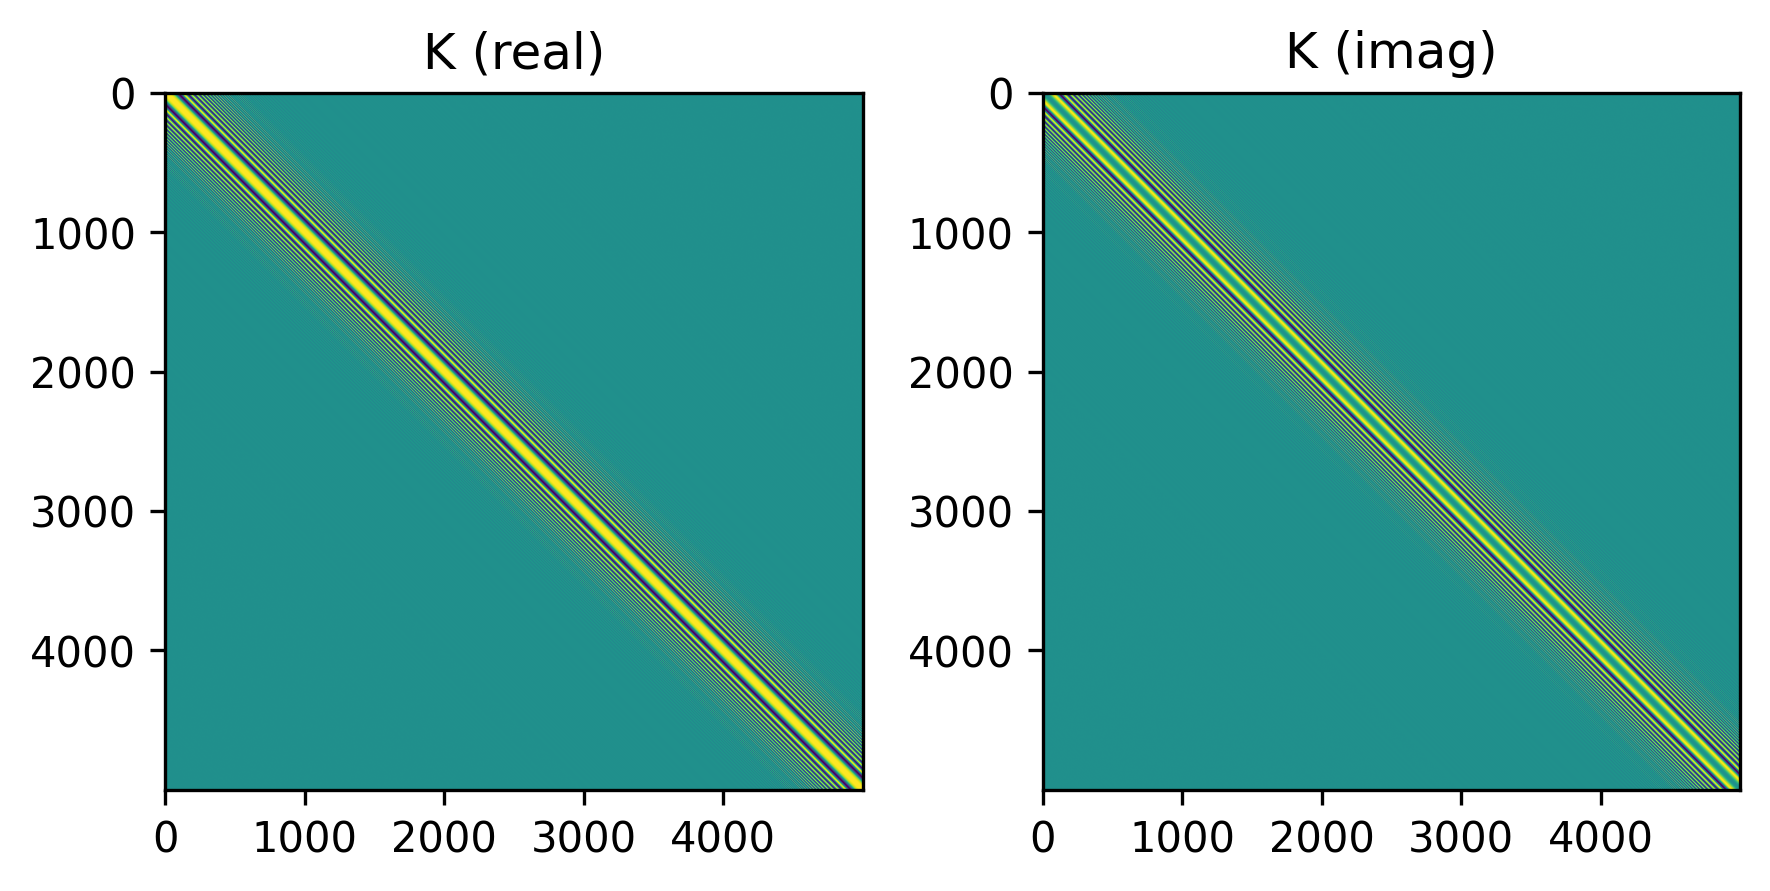

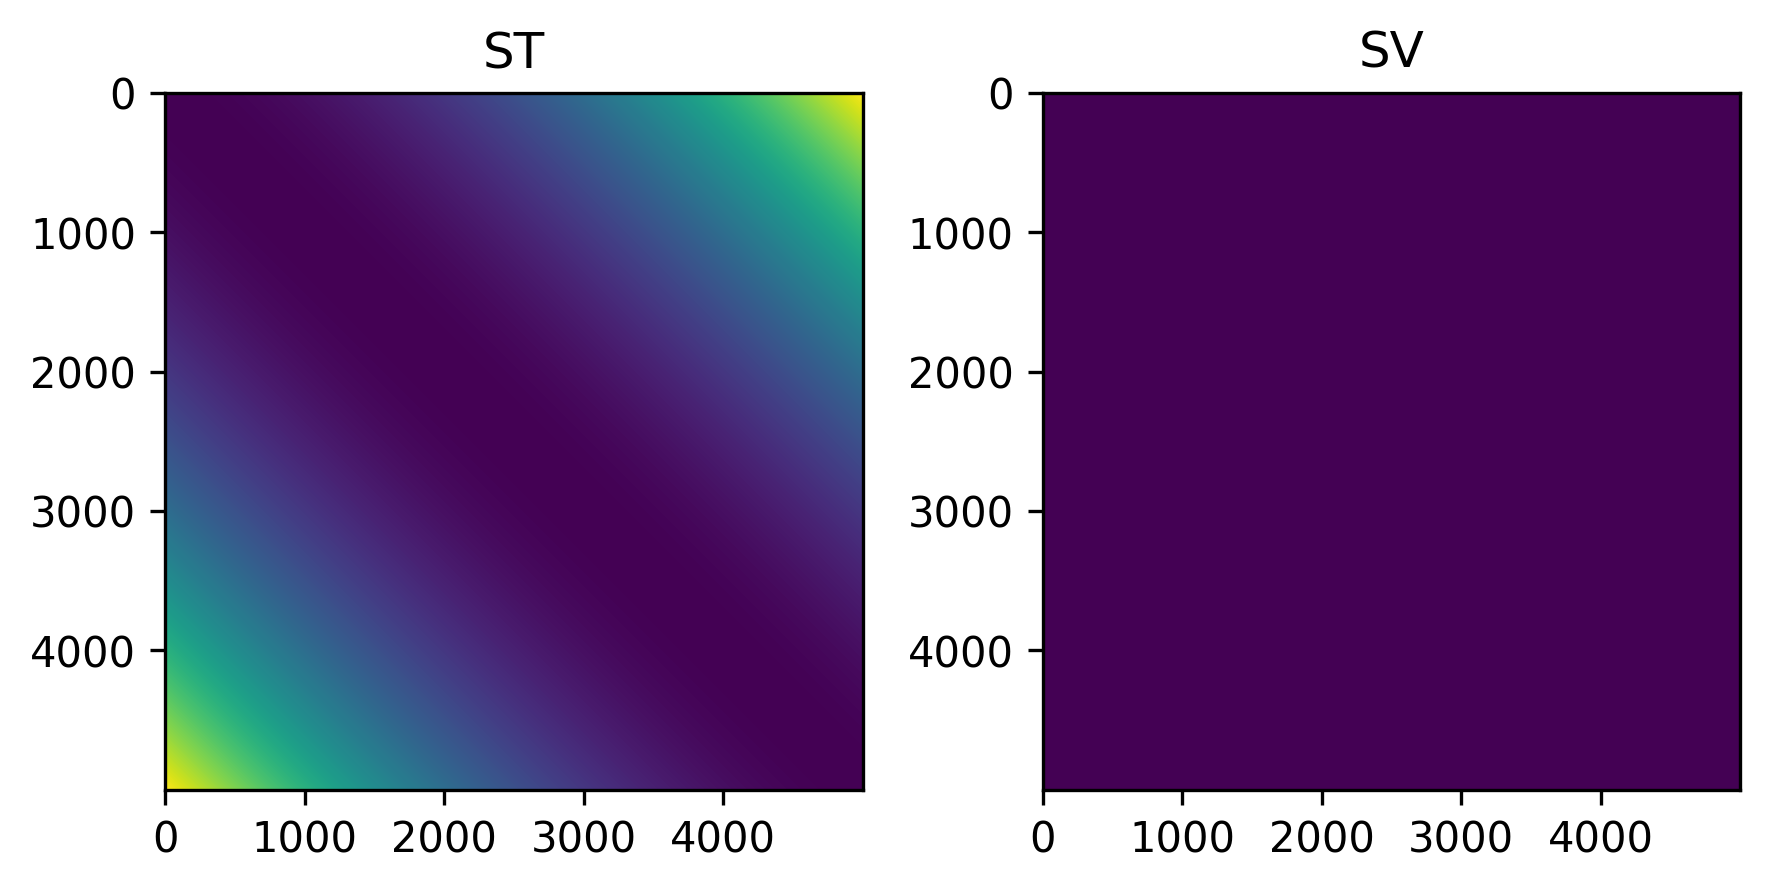

In [7]:
def init(hprms, coeffs=[]):
    ### Further parameter calculations ###
    constants = ObjectView(dict(
                             hbar=1/hprms.scale, m=hprms.m, 
                             numdx=int(hprms.spatial_density*hprms.scale),
                             numdt=int(hprms.time_density*hprms.scale), xrange=int(hprms.xrange), 
                             trange=int(hprms.trange), mom=hprms.momentum
                            ))
    dx = constants.xrange / constants.numdx  # scalar
    dt = constants.trange / constants.numdt  # scalar
    alpha = constants.m * (dx ** 2 / (2 * constants.hbar * dt))  # scalar
    beta = dt / constants.hbar  # scalar
    steps = constants.numdt // constants.trange
    interval = 2000 * hprms.vid_length / constants.numdt
    x = np.linspace(0, constants.xrange, constants.numdx)
    t = np.linspace(0, constants.trange, constants.numdt)

    ### Initialize a Gaussian wavepacket ###
    r0 = gaussian(x, constants.xrange/2, .025*constants.xrange)[:,None] # r0: [N x 1]
    r0[0, 0] = r0[-1, 0] = 0
    q0 = np.concatenate((np.cos(constants.mom * x)[:,None] * r0,
                         np.sin(constants.mom * x)[:,None] * r0), axis=1)
    q = torch.view_as_complex(torch.tensor(q0))
    
    ### Construct the phase-action matrix ###
    ST, SV, K = construct_operators(constants.numdx, hprms.div, coeffs, alpha, beta)

    return ObjectView(dict(x=x, t=t, ST=ST, SV=SV, K=K, q=q, interval=interval, steps=steps, dx=dx))

# calculating action over linear paths; constructing K-matrix
def construct_operators(N, div, coeffs, alpha, beta):
    ST, SV = np.zeros((2, N, N)) # both are [N x N] matrices
    temp = np.arange(N)
    pot = V(N, div, coeffs)
    for l in range(N):
        ST[:, l] += temp
        ST[l, :] -= np.transpose(temp)
        SV[:, l] += pot
        SV[l, :] -= np.transpose(pot)
    ST *= alpha * ST
    SV *= beta
    ST = torch.tensor(ST) * 1
    SV = torch.tensor(SV) * 1
    K = (torch.complex(0*ST, ST) - torch.complex(0*SV, SV)).exp()
    return ST, SV, K

produce_graphs(hprms)

### Simulating Wavepacket Evolution
Essentially, we are done. All that we need to do now is take the Gaussian wavepacket that we initialized above and repeatedly multiply by K. In analytic settings, time evolution is a unitary operator, and thus does not alter the wave function's normalization. However, in numerical settings, we normalize explicitly at every step.

In [8]:
def normalize(q):
    return q / q.norm()

def simulate(q, K, steps=500):
    q = normalize(q)
    qs = [q.clone()]
    for i in range(steps):
        q = normalize(q @ K)
        qs.append(q.clone())
    return torch.stack(qs)

produce_graphs(hprms, video='static/sample.mp4', static_K=False, static_S=False)

mp4 = open('static/sample.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML('<video width=400 controls><source src="{}" type="video/mp4"></video>'.format(data_url))

Note that, even though the edges of our computational boundary may at first look like the walls of a quantum well, they are not quite mathematically identical. In particular, we have made no attempt to secure the boundary conditions for our wave at the wall's edge. However, the global dynamics are analogous enough to produce qualitative results for such a system.

### Phase-Action Variation
The code also supports phase-action matrix visualization over a continuum of physical potentials, V. Here, we show an example sweeping over an increasingly strong cubic potential, and display the results as a video.

In [ ]:
### This cell creates a video of K-matrices describing a continuously deforming potential landscape ###

def make_Kvid(Ks, path, interval=60, **kwargs):
    plt.title('K-Matrix', fontweight="bold")
    fig = plt.figure(figsize=(6, 3), dpi=300)
    camera = Camera(fig)
    for i, K in enumerate(Ks):
      plt.imshow(K.real)
      plt.title('K-matrix real part')
      plt.ylabel('Path start')
      plt.xlabel('Path end')
      camera.snap()
    anim = camera.animate(blit=True, interval=interval, **kwargs)
    anim.save(path) ; plt.close()

# defines the K's we wish to see in the video
def make_Ks(sweep):
    for i in range(sweep):
      # coeffs are polynomial coefficients of our potential energy function
      coeffs = [0, 0, i/2, i/6]
      if i == 0:
        Ks = init(hprms, coeffs).K[None, ...]
      else:
        Ks = np.concatenate((Ks, init(hprms, coeffs).K[None, ...]), axis=0)
    return Ks

path = 'Kvid.mp4'
sweep = 100; vid_length = 10
make_Kvid(make_Ks(sweep), path, 1000 * vid_length / sweep)

mp4 = open(path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML('<video width=400 controls><source src="{}" type="video/mp4"></video>'.format(data_url))